<a href="https://colab.research.google.com/github/sivassubiksha3016/crispy-memory/blob/main/credit%20card%20fraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving credit card detection.csv to credit card detection (1).csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 

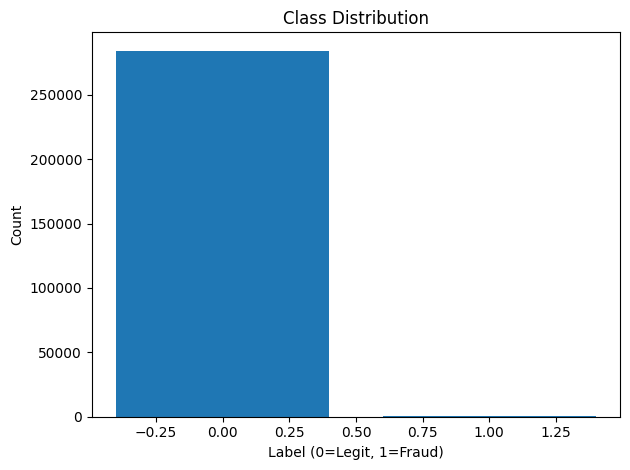

Accuracy: 0.9930128857835048
Confusion Matrix:
 [[56502   362]
 [   36    62]]


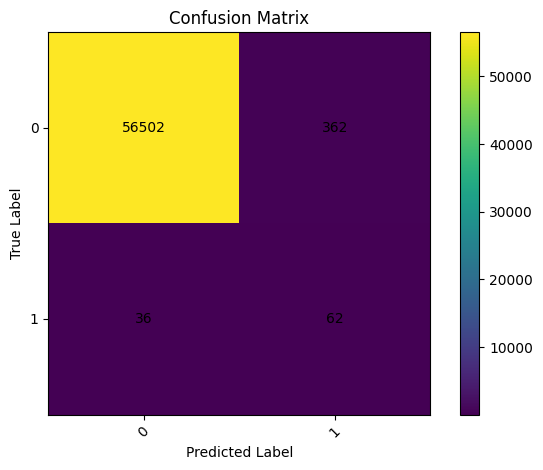

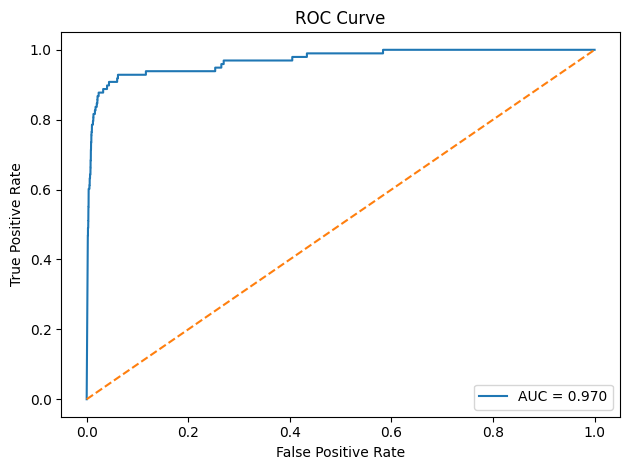

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Changed from MultinomialNB to GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload file
uploaded = files.upload()
file_name = "credit card detection.csv"
df = pd.read_csv(file_name)

# View data
print(df.head())
print(df.columns)

# Class Distribution Plot
label_counts = df['Class'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label (0=Legit, 1=Fraud)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Define Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Naive Bayes Model (numeric data)
model = GaussianNB() # Changed from MultinomialNB to GaussianNB
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

# Confusion Matrix Plot
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve (only if 2 classes)
if len(y.unique()) == 2:
    y_test_binary = (y_test == 1).astype(int)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")